   # Finalize Data Extraction and Preparation for Analysis

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm_notebook as tqdm

#display matplot lib generated visualizations in notebook
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('pre_cleaning_dataset.csv')

In [3]:
#display dataframe shape, datatypes and null counts
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872067 entries, 0 to 1872066
Data columns (total 21 columns):
FIRE_YEAR               1872067 non-null int64
FIRE_SIZE               1872067 non-null float64
STAT_CAUSE_DESCR        1872067 non-null object
distance                1872067 non-null float64
temp                    1872067 non-null float64
dewp                    1872067 non-null float64
slp                     1872067 non-null float64
visib                   1872067 non-null float64
wdsp                    1872067 non-null float64
mxpsd                   1872067 non-null float64
gust                    1872067 non-null float64
max                     1872067 non-null float64
min                     1872067 non-null float64
prcp                    1872067 non-null float64
fog                     1872067 non-null int64
rain_drizzle            1872067 non-null int64
snow_ice_pellets        1872067 non-null int64
hail                    1872067 non-null int64
thunder         

### Step 1: Handle Null values

In [4]:
#Replace Null indicators with actual Null values
df['dewp'].replace({9999.9: None}, inplace=True)
df['slp'].replace({9999.9: None}, inplace=True)
df['visib'].replace({999.9: None}, inplace=True)
df['wdsp'].replace({999.9: None}, inplace=True)
df['mxpsd'].replace({999.9: None}, inplace=True)
df['gust'].replace({999.9: None}, inplace=True)
df['max'].replace({9999.9: None}, inplace=True)
df['min'].replace({9999.9: None}, inplace=True)
df['prcp'].replace({99.99: None}, inplace=True)

#create list of null variables
null_vars = ['dewp','slp','visib','wdsp','mxpsd','gust','max','min','prcp']
#ensure datatypes are float for variables with null values
for var in null_vars:
    df[var] = pd.to_numeric(df[var])
#preview datashape to ensure success
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872067 entries, 0 to 1872066
Data columns (total 21 columns):
FIRE_YEAR               1872067 non-null int64
FIRE_SIZE               1872067 non-null float64
STAT_CAUSE_DESCR        1872067 non-null object
distance                1872067 non-null float64
temp                    1872067 non-null float64
dewp                    1776680 non-null float64
slp                     1224625 non-null float64
visib                   1738419 non-null float64
wdsp                    1817498 non-null float64
mxpsd                   1813648 non-null float64
gust                    1015216 non-null float64
max                     1870667 non-null float64
min                     1871017 non-null float64
prcp                    1815134 non-null float64
fog                     1872067 non-null int64
rain_drizzle            1872067 non-null int64
snow_ice_pellets        1872067 non-null int64
hail                    1872067 non-null int64
thunder         

In [5]:
#display distribution of variables with null values
df[null_vars].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp
count,1776680.00000,1224625.00000,1738419.00000,1817498.00000,1813648.00000,1015216.00000,1870667.00000,1871017.00000,1815134.00000
mean,44.18518,1016.52869,11.10486,6.05171,13.08895,22.12746,77.84301,49.85611,0.01969
std,15.69507,6.07176,6.37350,3.17586,5.13109,6.43024,14.91017,15.26347,0.13211
min,-74.20000,920.70000,0.00000,0.00000,0.20000,1.00000,-15.20000,-34.60000,0.00000
25%,32.50000,1012.50000,9.40000,3.80000,9.90000,17.10000,68.00000,37.90000,0.00000
50%,44.70000,1016.10000,10.00000,5.60000,12.00000,21.00000,79.00000,50.00000,0.00000
75%,55.60000,1020.30000,10.00000,7.80000,15.90000,25.10000,89.60000,61.00000,0.00000
max,86.90000,1057.70000,99.40000,73.00000,93.80000,100.80000,132.80000,106.00000,14.29000


In [6]:
#loop through null variables and impute medians
for var in null_vars:
    df[var].fillna(df[var].median(), inplace = True)
#ensure success
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872067 entries, 0 to 1872066
Data columns (total 21 columns):
FIRE_YEAR               1872067 non-null int64
FIRE_SIZE               1872067 non-null float64
STAT_CAUSE_DESCR        1872067 non-null object
distance                1872067 non-null float64
temp                    1872067 non-null float64
dewp                    1872067 non-null float64
slp                     1872067 non-null float64
visib                   1872067 non-null float64
wdsp                    1872067 non-null float64
mxpsd                   1872067 non-null float64
gust                    1872067 non-null float64
max                     1872067 non-null float64
min                     1872067 non-null float64
prcp                    1872067 non-null float64
fog                     1872067 non-null int64
rain_drizzle            1872067 non-null int64
snow_ice_pellets        1872067 non-null int64
hail                    1872067 non-null int64
thunder         

### Step 2: Remove duplicate rows

In [7]:
#count rows before duplicates are dropped
obs_before_drop = len(df)
#drop all duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
#verify number of duplicate observations dropped
print("Total Observations dropped:",(obs_before_drop - len(df)))

Total Observations dropped: 6437


### Step 3: Transform categorical variables to a numeric dummies for multiple regression analysis

In [8]:
#retain cat_df for univariate analysis of categorical variables
cat_df = df[['month','STAT_CAUSE_DESCR']]
cat_df = cat_df.join(df['FIRE_SIZE'])

#loop through categorical variables and create dummy variables
for var in ['month','STAT_CAUSE_DESCR']:
    dummies = pd.get_dummies(df[var], drop_first=True)
    #rename each dummy variable to include original column title
    for col in dummies:
        dummies.rename(columns={col:'{}_{}'.format(var,col)}, inplace=True)
    #join each dummy dataframe to original table
    df = df.join(dummies)
    #drop categorical variable from original dataframe
    df.drop(columns=var, inplace=True)

#ensure all variables in the dataframe are of a numeric datatype
for var in df.columns:
    df[var] = pd.to_numeric(df[var])

### Step 4: Preview variable distributions with univariate visualizations

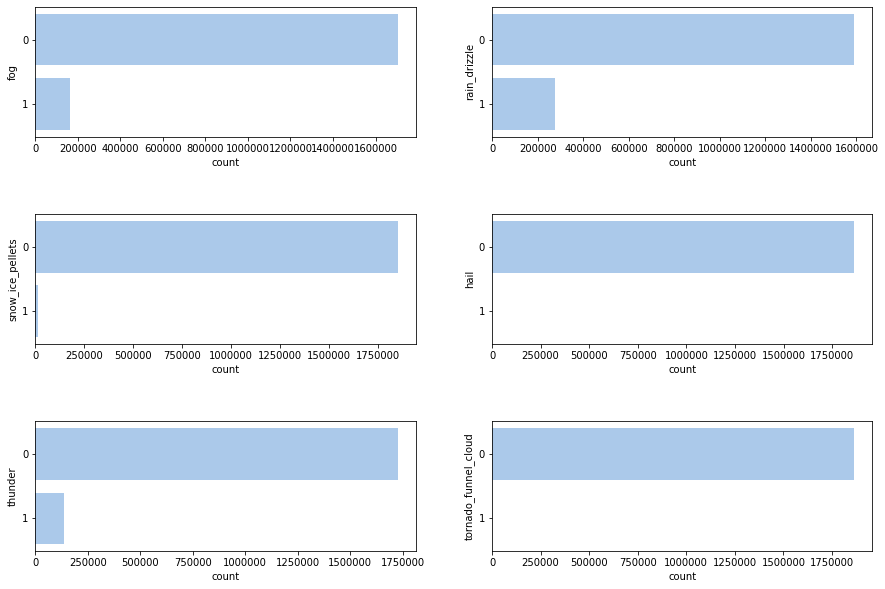

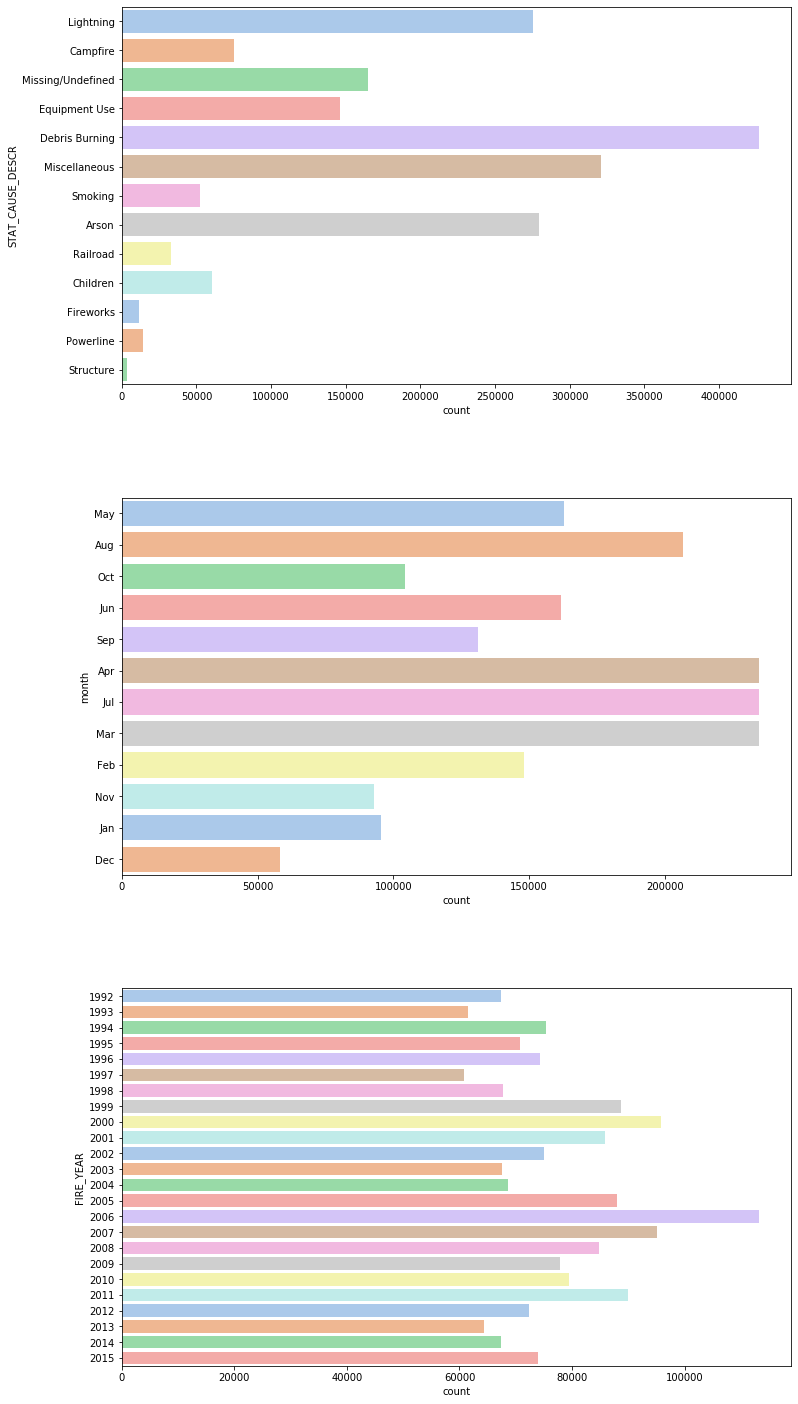

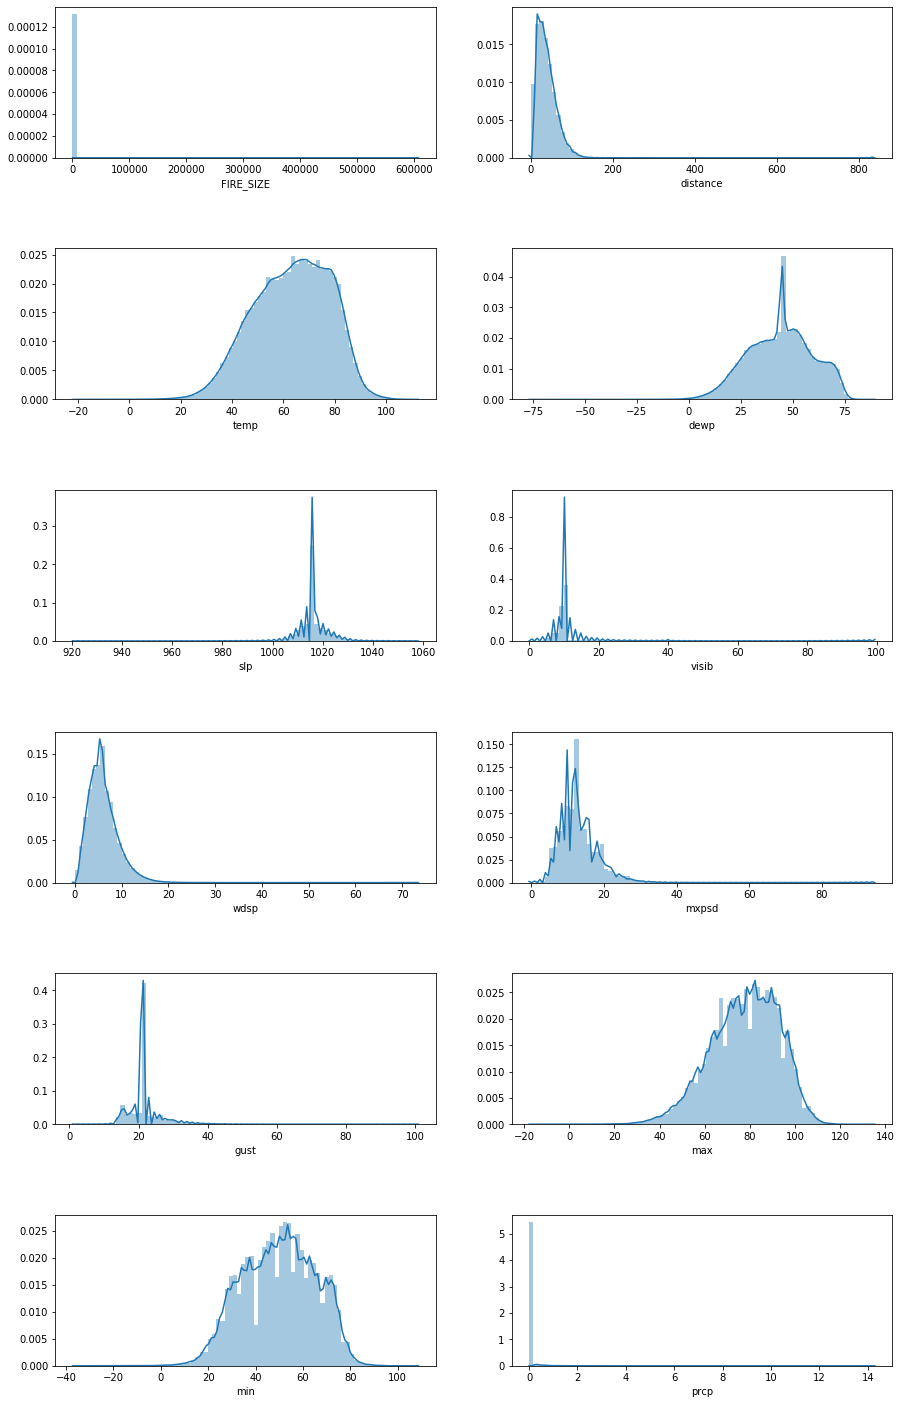

In [9]:
#Creates bar charts of all binary variables
#set first color in seaborn color_palette to the `base_color` 
base_color = sns.color_palette('pastel')[0]
#define binary variables
binary_vars = ['fog','rain_drizzle','snow_ice_pellets','hail',
              'thunder','tornado_funnel_cloud'] 
#creates 6 subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
plt.subplots_adjust(wspace=.2, hspace=.6)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each binary variable and create visualization
for var in binary_vars:   
    #create countplot for variable
    sns.countplot(data=df, y=var, color=base_color, ax=ax[x_pos,y_pos])
    #change axis position
    if y_pos == 1:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
#save resulting figure
plt.savefig('univariate_binary_bars.png', bbox_inches='tight')

#creates categorical and ordinal bar charts
#set pastel palette
pastel = sns.color_palette('pastel')
#set appropriate plotsize with three subplots
fig, ax = plt.subplots(nrows=3, figsize=(12,25))
plt.subplots_adjust(hspace=.3, wspace=0.5)
#Create all 3 plots to subplot and save
sns.countplot(data=cat_df, y='STAT_CAUSE_DESCR', palette='pastel', ax=ax[0])
sns.countplot(data=cat_df, y='month', palette='pastel', ax=ax[1])
sns.countplot(data=df, y='FIRE_YEAR', palette='pastel', ax=ax[2])
#save resulting figure
plt.savefig('univariate_categorical_ordinal_bars.png', bbox_inches='tight')

#create histograms for continuous variables
#define continuous variables
cont_vars = ['FIRE_SIZE','distance','temp','dewp','slp','visib','wdsp',
            'mxpsd','gust','max','min','prcp']
#set appropriate plotsize with twelve subplots
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25))
plt.subplots_adjust(wspace=.2, hspace=.6)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each continuous variable and create visualization
for var in cont_vars:   
    #create histogram for variable
    sns.distplot(df[var], bins=80, ax=ax[x_pos,y_pos])
    #change axis position
    if y_pos == 1:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
#save resulting figure
plt.savefig('univariate_continuous_hists.png', bbox_inches='tight')

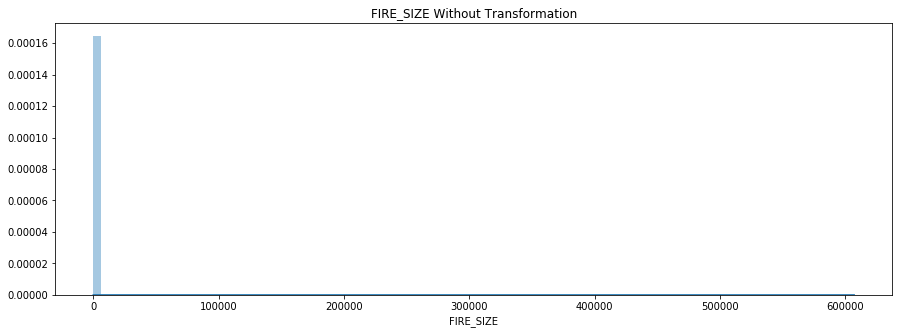

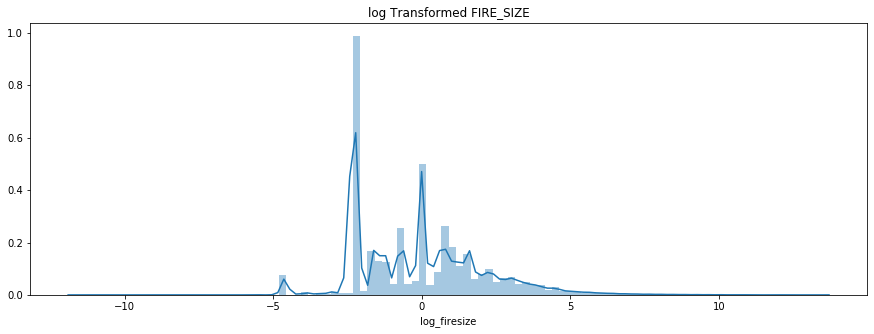

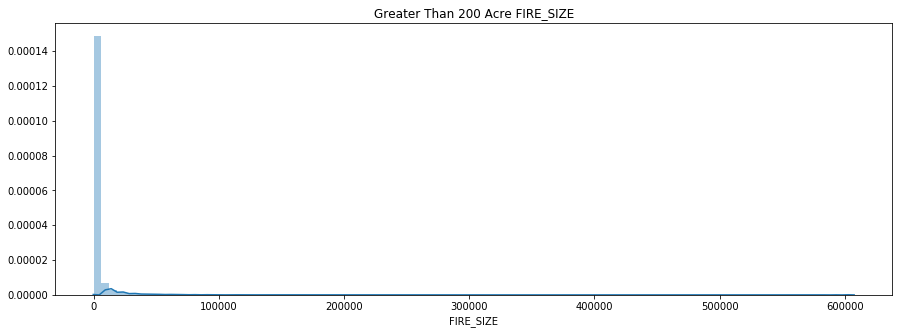

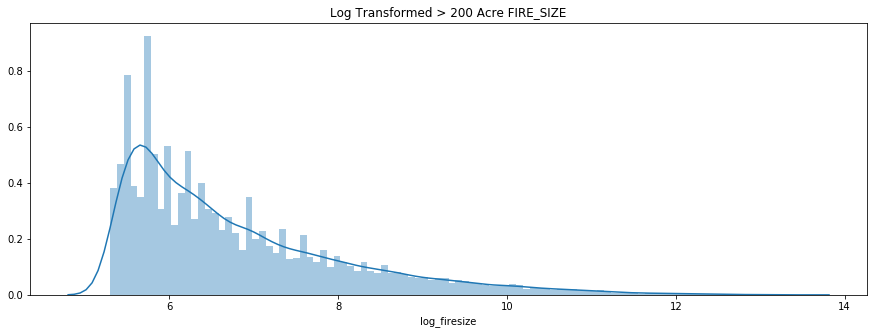

In [10]:
#create histogram for non-transformed `FIRE_SIZE`
plt.figure(figsize=(15,5))
sns.distplot(df['FIRE_SIZE'], bins=100)
plt.title('FIRE_SIZE Without Transformation')
plt.show()

#create log transformed `FIRE_SIZE` variable
df['log_firesize'] = np.log(df['FIRE_SIZE'])
#create histogram for log-transformed `FIRE_SIZE`
plt.figure(figsize=(15,5))
sns.distplot(df['log_firesize'], bins=100)
plt.title('log Transformed FIRE_SIZE')
plt.show()

#trim `FIRE_SIZE` and assign to `trimmed_firesize` dataframe
trimmed_firesize = df[df['FIRE_SIZE'] > 200]

#create histogram for trimmed `FIRE_SIZE`
plt.figure(figsize=(15,5))
sns.distplot(trimmed_firesize['FIRE_SIZE'], bins=100)
plt.title('Greater Than 200 Acre FIRE_SIZE')
plt.show()
#create histogram for trimmed and log transformed `FIRE_SIZE`
plt.figure(figsize=(15,5))
sns.distplot(trimmed_firesize['log_firesize'], bins=100)
plt.title('Log Transformed > 200 Acre FIRE_SIZE')
plt.show()

### Step 5: Preview variable distributions versus `FIRE_SIZE` with bivariate visualizations

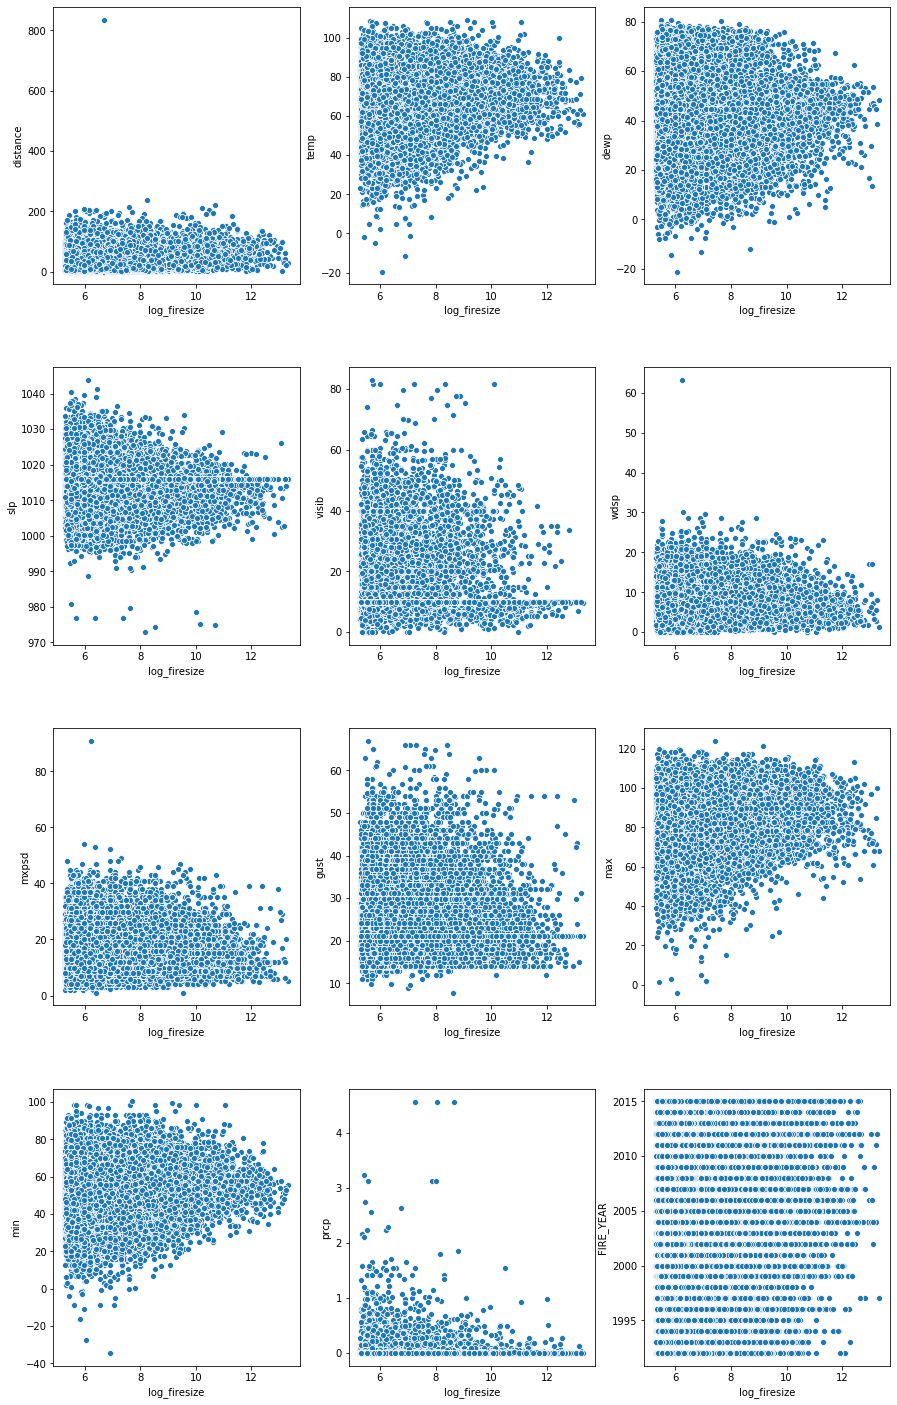

In [11]:
#visualize continuous and ordinal variables vs `FIRE_SIZE`
#creates 12 subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,25))
plt.subplots_adjust(wspace=.2, hspace=.3)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#remove `FIRE_SIZE' from cont_vars for visualization if it is in list
if 'FIRE_SIZE' in cont_vars:
    cont_vars.remove('FIRE_SIZE')
#loop through each continuous variable and create visualization
for var in tqdm(cont_vars + ['FIRE_YEAR']):   
    #create histogram for variable
    sns.scatterplot(data=trimmed_firesize, x='log_firesize', y=var, ax=ax[x_pos,y_pos])
    #change axis position
    if y_pos == 2:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
#save resulting figure
plt.savefig('bivariate_continuous_ordinal_scatters.png', bbox_inches='tight')

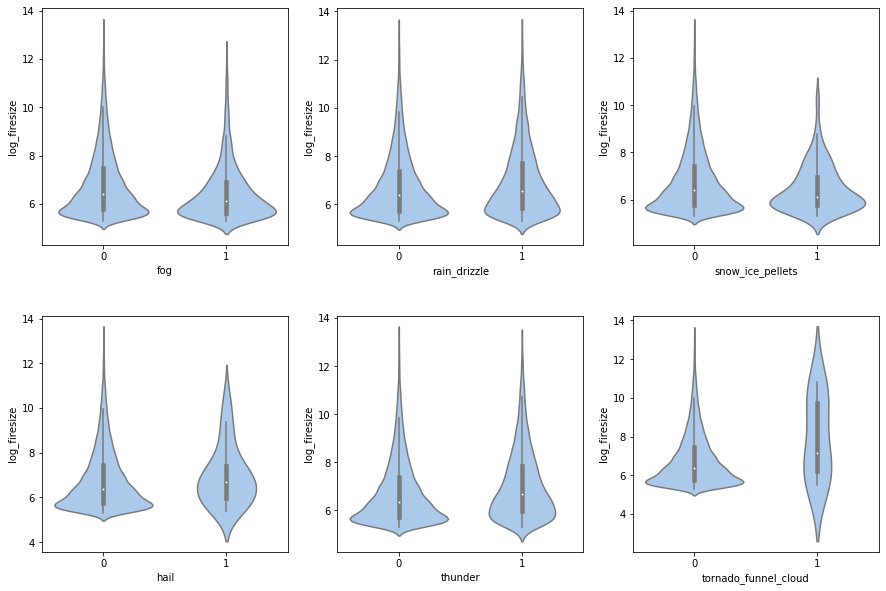

In [12]:
#visualize binary variables vs `FIRE_SIZE`
#creates 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
plt.subplots_adjust(wspace=.2, hspace=.3)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each continuous variable and create visualization
for var in tqdm(binary_vars):   
    #create violinplots for variable levels
    sns.violinplot(data=trimmed_firesize, x=var, y='log_firesize', color=base_color, ax=ax[x_pos,y_pos])
    #change axis position
    if y_pos == 2:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
#save resulting figure
plt.savefig('bivariate_binary_violins.png', bbox_inches='tight')

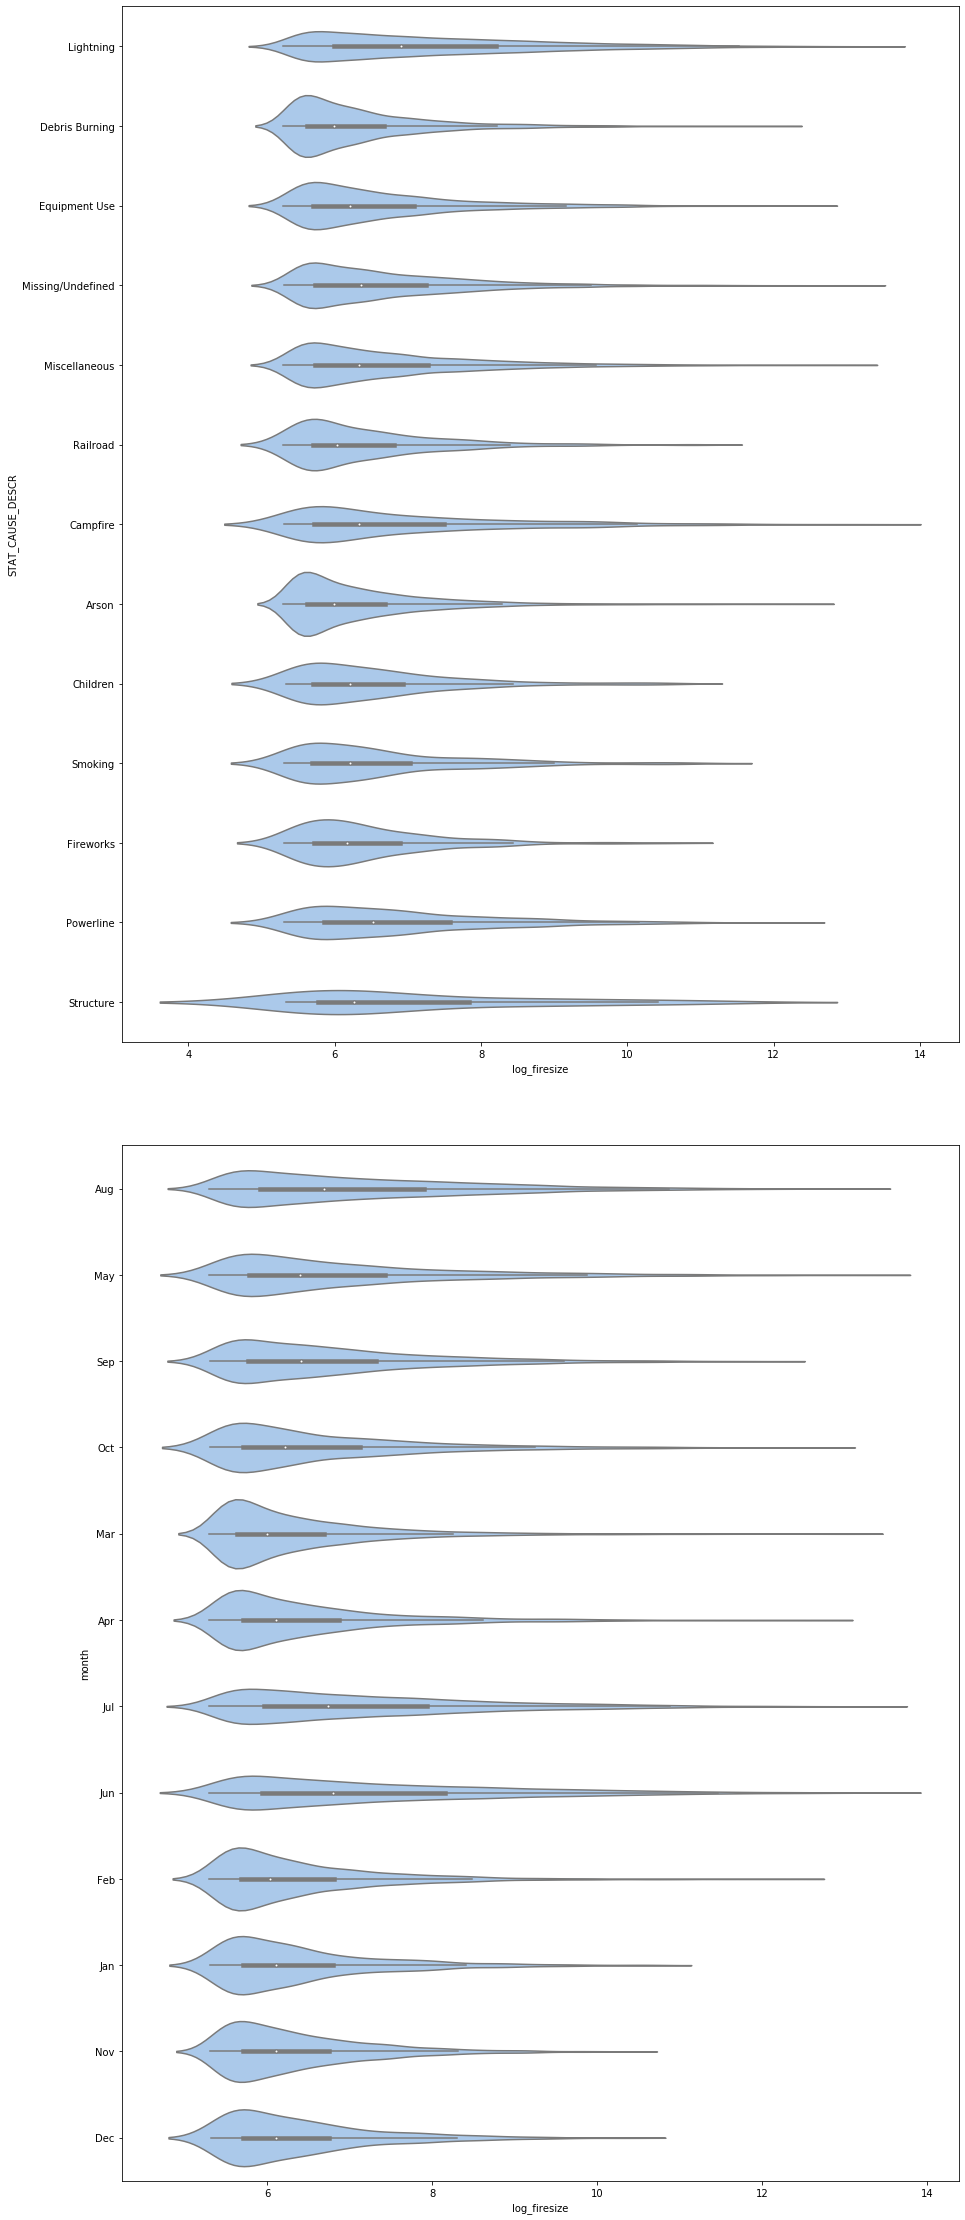

In [13]:
#creates categorical violinplots vs `FIRE_SIZE`
#trim lower 200 obs from cat_df
cat_df = cat_df[cat_df['FIRE_SIZE'] > 200]
#create `log_firesize variable in cat_df
cat_df['log_firesize'] = np.log(cat_df['FIRE_SIZE'])
#set appropriate plotsize with two subplots
fig, ax = plt.subplots(nrows=2, figsize=(15,40))
plt.subplots_adjust(hspace=.1, wspace=0.5)
#Create two violin plots
sns.violinplot(data=cat_df, y='STAT_CAUSE_DESCR', x='log_firesize', color=base_color, ax=ax[0])
sns.violinplot(data=cat_df, y='month', x='log_firesize', color=base_color, ax=ax[1])
#save resulting figure
plt.savefig('bivariate_cat_violins.png', bbox_inches='tight')

### Step 6: Remove outliers in continuous variable distributions

In [14]:
#remove prcp for outlier consideration since it is so highly skewed
if 'prcp' in cont_vars:
    cont_vars.remove('prcp')
#calulate z-scores for all remoaining continuous variables
z_score = stats.zscore(df[cont_vars])
#define number of observations with high z-scores
obs_to_remove = len(df) - len(df[(z_score < 3).all(axis=1)])
#remove observations with high z-scores
df = df[(z_score < 3).all(axis=1)]
obs_removed = obs_to_remove

#use while loop to recursively remove remaining outliers
while (obs_to_remove > 0):
    #calulate z-scores for all remoaining continuous variables
    z_score = stats.zscore(df[cont_vars])
    #define number of observations with high z-scores
    obs_to_remove = len(df) - len(df[(z_score < 3).all(axis=1)])
    #remove observations with high z-scores
    df = df[(z_score < 3).all(axis=1)]
    #add up observations removed
    obs_removed += obs_to_remove
#print number of observations removed
print('Obervations removed: {}'.format(obs_removed)) 

Obervations removed: 345211


In [15]:
#drop `log_firesize` from dataframe
df.drop(columns='log_firesize', inplace=True)
#export resulting dataframe to `clean_dataset.csv`
df.to_csv('clean_dataset.csv', index=False)